# Simple Regression

## Boston Housing Dataset

In [1]:
import numpy as np

In [2]:
# Load the dataset work-around
import pickle
with open('boston.pkl', 'rb') as file:
    boston = pickle.load(file)

# The code loads a dataset stored in a binary file named boston.pkl into the Python variable boston.
# This dataset is likely pre-processed or prepared in some way and saved using pickle so it can be reused without reprocessing every time.

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.data = np.delete(boston.data, obj=11, axis=1)
boston.feature_names = np.delete(boston.feature_names, obj=11, axis=0)

In [6]:
#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

import pandas as pd

df_boston = pd.DataFrame(X)
df_boston.columns=boston.feature_names
df_boston['target'] = y
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
df_boston.to_csv('boston.csv', index=False)

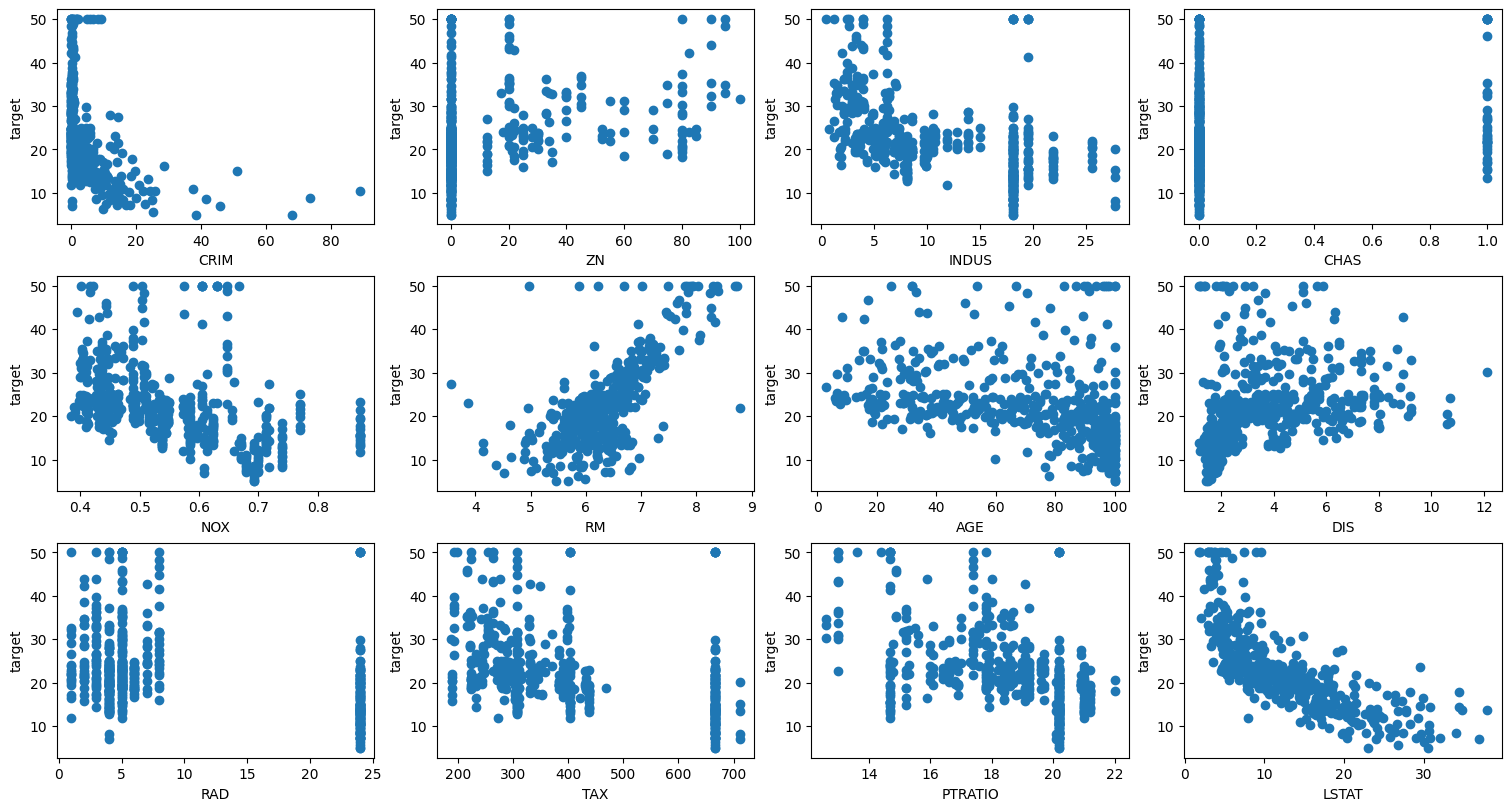

In [8]:
# visualize the relationship between the features and the response using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')

fig, axes = plt.subplots(3, 4,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns[:-1]:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],df_boston.target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1

plt.show()


<Axes: >

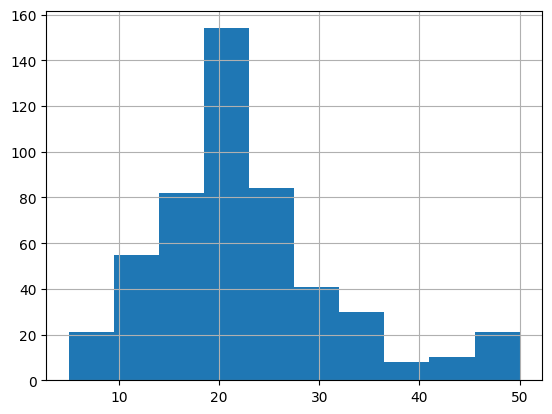

In [9]:
df_boston['target'].hist()

In [10]:
#Predicting house value from a single feature
X_rooms = df_boston[['RM']]
y = df_boston[['target']]

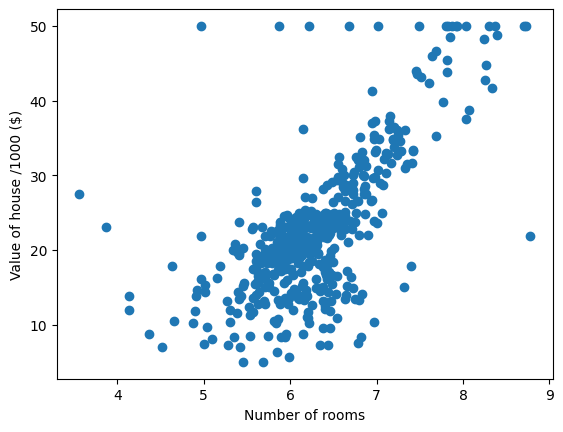

In [11]:
#Let's plot house value as a function of number of rooms using matplotlib's plt dot scatter
%matplotlib inline
plt.scatter(X_rooms,y)
plt.ylabel('Value of house /1000 ($)') #labeling the y label
plt.xlabel('Number of rooms') #labeling the x label
plt.show()
#more rooms lead to higher prices

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rooms,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression #Ordinary Least Squares

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [14]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import LinearRegression #Ordinary Least Squares
import numpy as np

regressor = LinearRegression()
# fit_intercept : boolean, optional, default True
#    whether to calculate the intercept for this model.

#copy_X : boolean, optional, default True
#    If True, X will be copied; else, it may be overwritten.


# Create linear regression object
# Train the model using the training sets
# regressor.fit(X_train, y_train)

#DEFINE YOUR GRIDSEARCH

from sklearn.model_selection import GridSearchCV
parameters = {} #'normalize':[True,False]

gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV, default metric is R^2

gs.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=LinearRegression(), param_grid={})

In [15]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.478013 using {}
0.478013 (0.042028) with: {}


In [16]:
#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

0.4584649934303068

# computing MAE, MSE, RMSE, r²
 - Mean Absolute Error (MAE): $$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
 - Mean Squared Error  (MSE): $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
 - Root Mean Squared Error (RMSE) : $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
 - R-Squared:  $$R^2 = 1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2} $$

In [17]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train)))
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",metrics.r2_score(y_train, gs.predict(X_train)))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",metrics.r2_score(y_test, gs.predict(X_test)))

MAE train:  4.5030631562319705
MSE train:  45.01275449524406
RMSE train:  6.709154529092623
r2:  0.4878892853275991
MAE test:  4.314224104076755
MSE test:  40.35144969787305
RMSE test:  6.352279094771659
r2:  0.4584649934303068


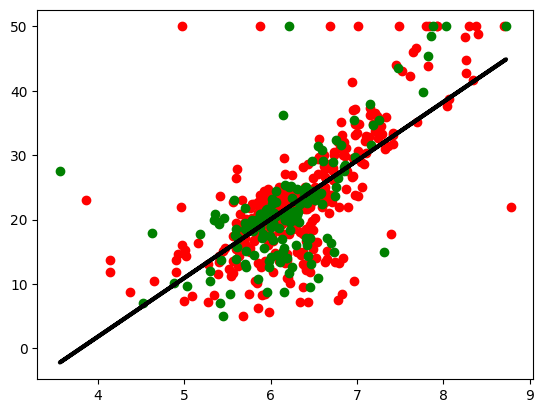

In [18]:
#plotting train, test, and regression line

plt.scatter(X_train,y_train, color='red')
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, gs.predict(X_test), color='black',linewidth=3)
plt.show()

In [19]:
# Estimated coefficients for the linear regression problem.
print('Coefficients: ', gs.best_estimator_.coef_)

#Independent term in the linear model.
print('Intercept: ', gs.best_estimator_.intercept_)

Coefficients:  [[9.1181022]]
Intercept:  [-34.66230744]


In [20]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

error_train.describe()


,target
count,3.540000e+02
mean,-3.612929e-15
std,6.718651e+00
min,-3.934534e+01
25%,-3.120811e+00
50%,-1.591403e-01
75%,2.478487e+00
max,2.349463e+01


In [21]:
error_test.describe()


,target
count,152.000000
mean,0.362272
std,6.362906
min,-29.692746
25%,-2.027650
50%,0.376584
75%,3.213688
max,17.018374


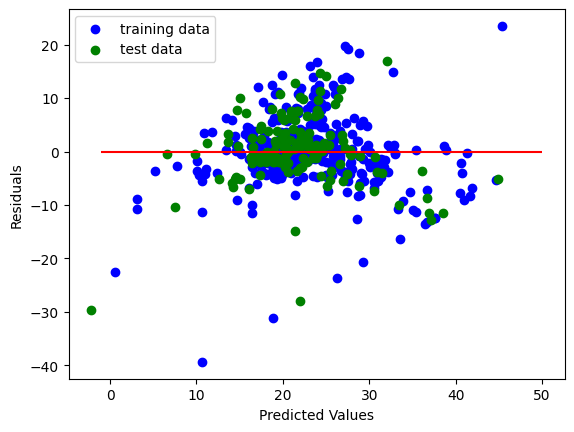

In [22]:
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

## Normality Test (homoscedasticity vs heteroscedasticity)

In [23]:
nb_error_train = np.array(error_train).flatten()

In [24]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(error_train)

scaled_error_train = scaler.transform(error_train).flatten()

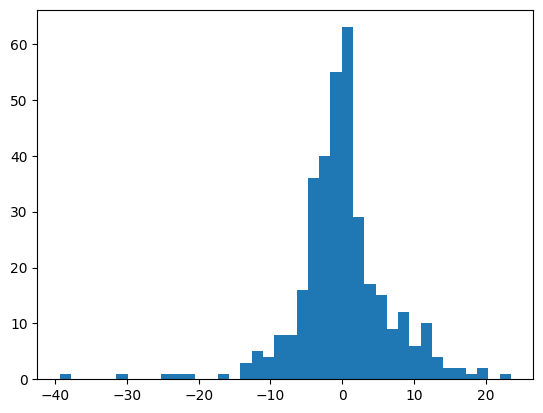

In [25]:
plt.hist(nb_error_train, bins='auto')
plt.show()

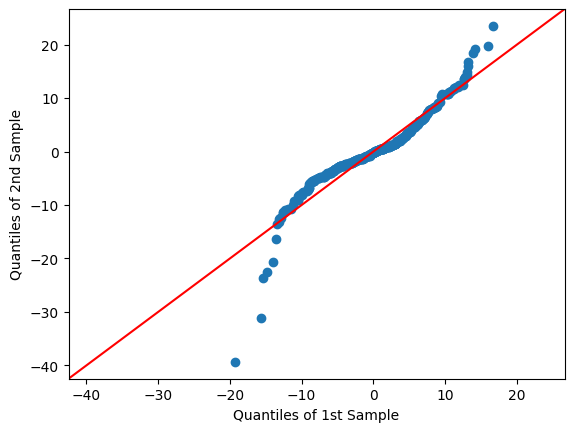

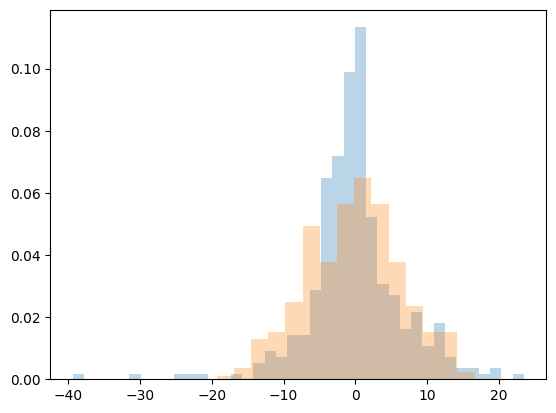

In [26]:
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt

# We test a normal distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error_train)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error_train))
test_dist.sort()

# qq-plot using statsmodels
qqplot_2samples(test_dist,np.array(error_train).flatten(),  line='45')
plt.show()

## We create the percentiles for both distributions
#percs = np.linspace(0,100,21)
#q_a = np.percentile(error_train, percs)
#q_b = np.percentile(test_dist, percs)

## and generate the QQ-plot
#plt.plot(q_a,q_b, ls="", marker="o")
#plt.title("QQ plot")
#x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
#plt.plot(x,x, color="k", ls="--")
#plt.show()

plt.hist(error_train,alpha=.3, density=True,bins='auto')
plt.hist(test_dist,alpha=.3, density=True,bins='auto')
plt.show()

In [27]:
# Kolmogorov-Smirnov Test
#    Test the distribution G(x) against a given distribution F(x).
#    Under the null hypothesis the two distributions are identical, G(x)=F(x).

from scipy import stats
stats.kstest(scaled_error_train,"norm")
#stats.kstest(nb_error_train,test_dist)

KstestResult(statistic=0.1096464609255795, pvalue=0.00036722576100494785, statistic_location=0.340583416371223, statistic_sign=1)

In [28]:
# D’Agostino Test
#    Under the null hypothesis that the distributions follows a normal distribution.

stats.normaltest(scaled_error_train)

NormaltestResult(statistic=68.44575395211507, pvalue=1.3714923024197424e-15)

In [29]:
# Shapiro test for normality
from scipy import stats
stats.shapiro(scaled_error_train)

ShapiroResult(statistic=0.9183431539457789, pvalue=5.976663202044754e-13)